# Experimentación con filtros de imagenes.
Para analizar el uso de threads en los filtros de imágenes podemos contemplar varios factores: **Cantidad de threads**, **tipo de filtro**, **tamaño de imagen** y **hardware usado**. Cada factor, inicialmente, se va a contemplar de forma aislada para poder tener una visión separada de cada parámetro y poder encontrar la forma óptima de usar los filtros. A su vez, más adelante se van a mezclar algunos parámetros para poder seguir sacando conclusiones.
## Tamaño de imagen
Mi hipótesis inicial es que, claramente mientras mas grande sea la imagen más tiempo va a tardar en aplicar el filtro seleccionado. Pero igualmente voy a comprobarlo. Tengo preparadas 10 imagenes desde 100x100 pixeles hasta 1000x1000 pixeles avanzando de 100 en 100. Para tener mayor exactitud voy a probarlo 50 veces con cada imagen


In [1]:
# preparaciones iniciales
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np
! echo "" > ../out/stats.csv

def plot(ths, time, std, title, xlabel, ylabel):

    fig, ax = plt.subplots()
    ax.plot(ths, time,'b-', color='blue')
    if np.any(std) != 0:
        ax.fill_between(ths, time-std, time+std, color='turquoise')


    ax.set(xlabel=xlabel, ylabel=ylabel,
           title=title)
    ax.grid()

    fig.savefig("test.png")
    plt.show()

In [2]:
# ejecuto los tests
for i in range(1, 11):
    for _ in range(50):
        w = i * 100
        f = f"../img/{w}.ppm"
        os.system(f"../out/a.out br 1 {f} .5")

In [3]:
# levanto los datos
dataframe = pandas.read_csv("../out/stats.csv", names=["Threads", "Time", "Tamaño imagen"])
dataframe

,Threads,Time,Tamaño imagen
0,1,0.001020,10000
1,1,0.002224,10000
2,1,0.002226,10000
3,1,0.001810,10000
4,1,0.001983,10000
...,...,...,...
495,1,0.098465,1000000
496,1,0.098184,1000000
497,1,0.098215,1000000
498,1,0.096247,1000000


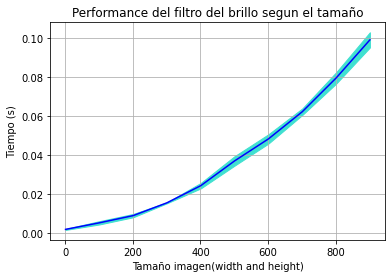

In [4]:
plot(np.array(range(1, 1000, 100)),
     dataframe.groupby("Tamaño imagen")["Time"].mean(),
     dataframe.groupby("Tamaño imagen")["Time"].std(),
     "Performance del filtro del brillo segun el tamaño",
     "Tamaño imagen(width and height)",
     "Tiempo (s)")

Claramente mientras mas grande sea la imagen, más tiempo va a costar procesarla.
## Cantidad de threads
Ahora voy a comprobar como cambia el tiempo de procesamiento si agregamos cada vez más threads, la primera hipótesis que se me ocurre es que mientras más threads, más performance, pero también es verdad que hay que contemplar que el thread tarda un tiempo en crearse, además del "precio" que hay que pagar del context switch. Igualmente, voy a correr los tests para estar seguros.

In [14]:
# ejecuto los tests
! echo "" > ../out/stats.csv
for i in range(1, 21):
    for _ in range(20):
        f = f"../img/800.ppm"
        os.system(f"../out/a.out br {i} {f} .5")

In [12]:
# levanto los datos
dataframe = pandas.read_csv("../out/stats.csv", names=["Threads", "Time", "Tamaño imagen"])
dataframe

,Threads,Time,Tamaño imagen
0,1,0.063699,640000
1,1,0.061521,640000
2,1,0.062720,640000
3,1,0.061652,640000
4,1,0.067338,640000
...,...,...,...
995,20,0.061708,640000
996,20,0.061835,640000
997,20,0.062414,640000
998,20,0.061982,640000


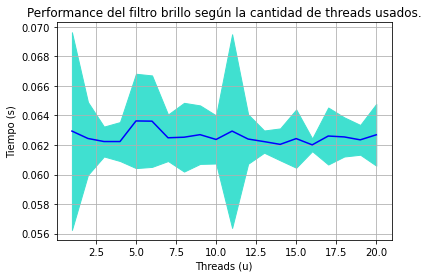

In [13]:
plot(np.array(range(1, 21)),
     dataframe.groupby("Threads")["Time"].mean(),
     dataframe.groupby("Threads")["Time"].std(),
     "Performance del filtro brillo según la cantidad de threads usados.",
     "Threads (u)",
     "Tiempo (s)")